# Visualizing results

Here, we will show some typical examples of visualizations that are used often to show results in ML studies in materials science.

We will use the open-source [`ML_figures` package](https://github.com/kaaiian/ML_figures) and the example data provided by the package to generate these figures.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import the ML_figures package and the figure-plotting functions
from ML_figures.figures import act_pred
from ML_figures.figures import residual, residual_hist
from ML_figures.figures import loss_curve
from ML_figures.figures import element_prevalence

## Predicted vs. actual value plots

These plots, you have already seen before in the previous notebooks.

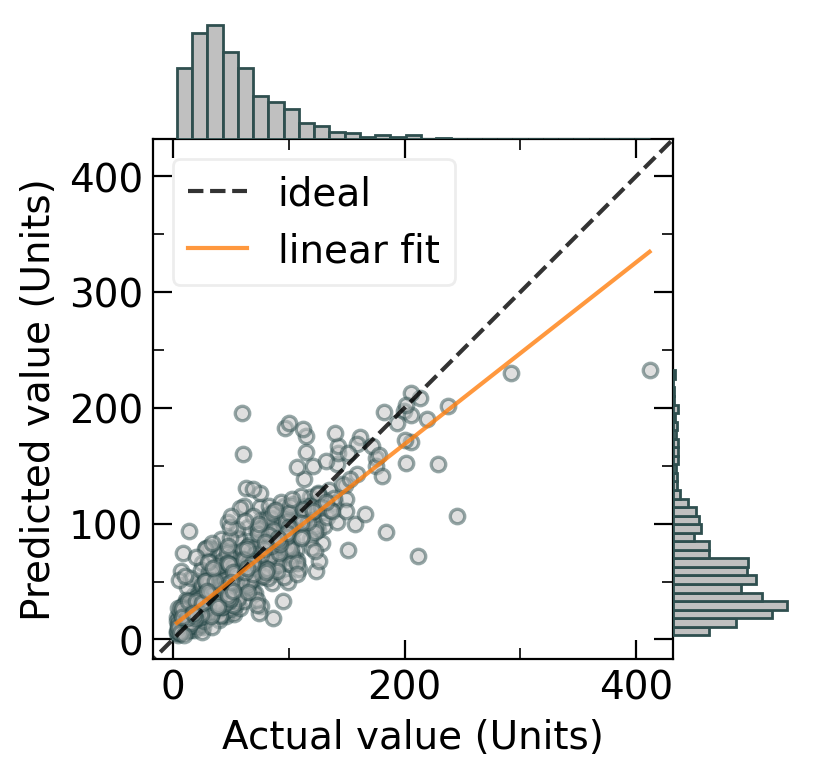

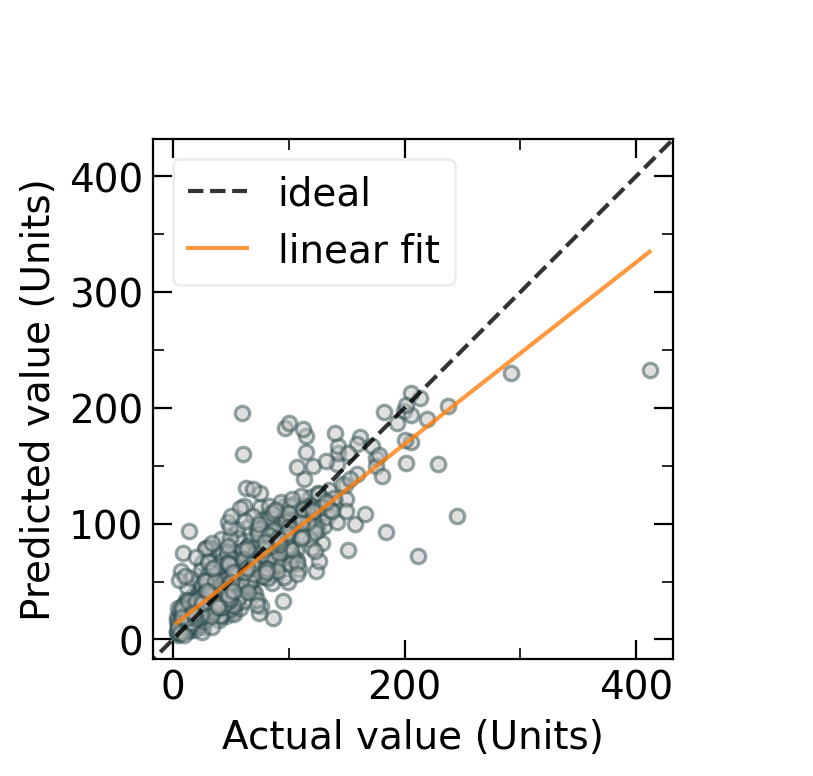

In [2]:
# Read in example act vs. pred data
df_act_pred = pd.read_csv('ML_figures/example_data/act_pred.csv')
y_act, y_pred = df_act_pred.iloc[:, 1], df_act_pred.iloc[:, 2]

act_pred(y_act, y_pred,
         reg_line=True,
         save_dir='ML_figures/example_figures')

act_pred(y_act, y_pred,
         name='example_no_hist',
         x_hist=False, y_hist=False,
         reg_line=True,
         save_dir='ML_figures/example_figures')

## Residual error plots

Residual error plots show how far your model's predictions deviate from the actual values.
They are using the same data used in the predicted vs. actual plots; however, instead of plotting predicted vs. actual values, residual error plots plot (predicted - actual) vs. actual values.

This lets you visually analyze your model's prediction error on a straight horizontal line.

Alternatively, you can plot the residual errors on a histogram, and optionally with a kernel density estimation (kde).

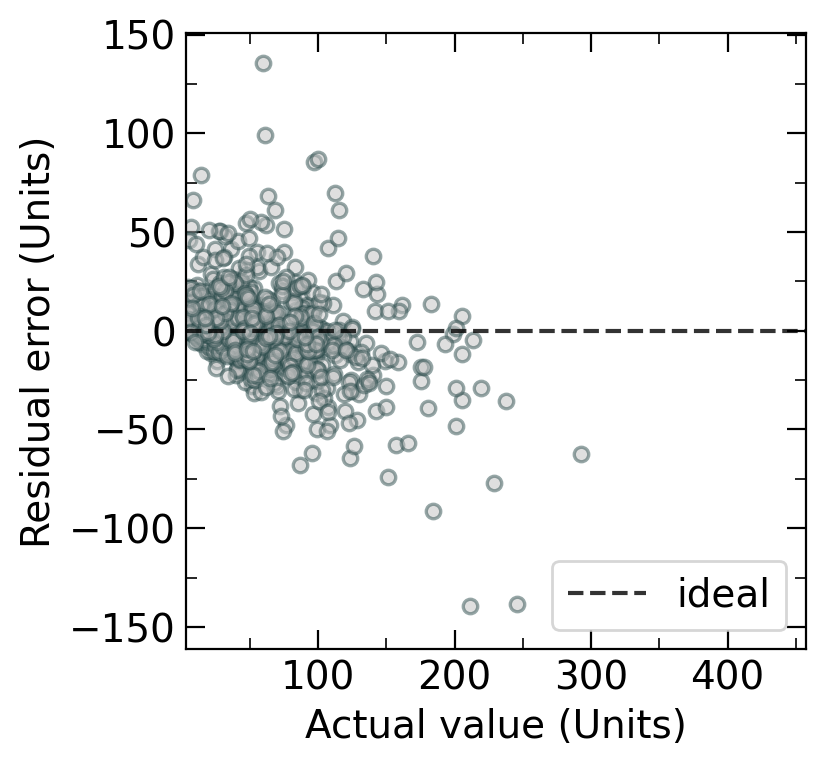

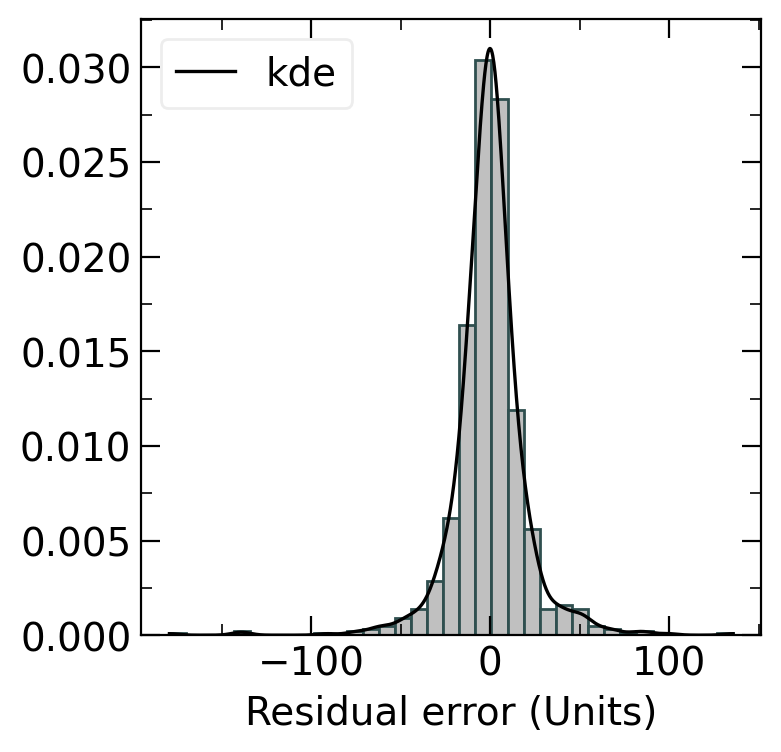

In [3]:
residual(y_act, y_pred,
         save_dir='ML_figures/example_figures')

residual_hist(y_act, y_pred,
              save_dir='ML_figures/example_figures')

## Loss curves

Loss curves show the loss of a neural network model vs. epoch throughout the training process.
It is typically evaluated using the training and validation dataset at the end of each epoch (or every $n$ epochs, where $n$ is a small number, if evaluating every epoch takes too many resources).

Typically, loss curves plot the model performance (such as $r^2$ score) or loss (such as $\textrm{MAE}$) against epoch.

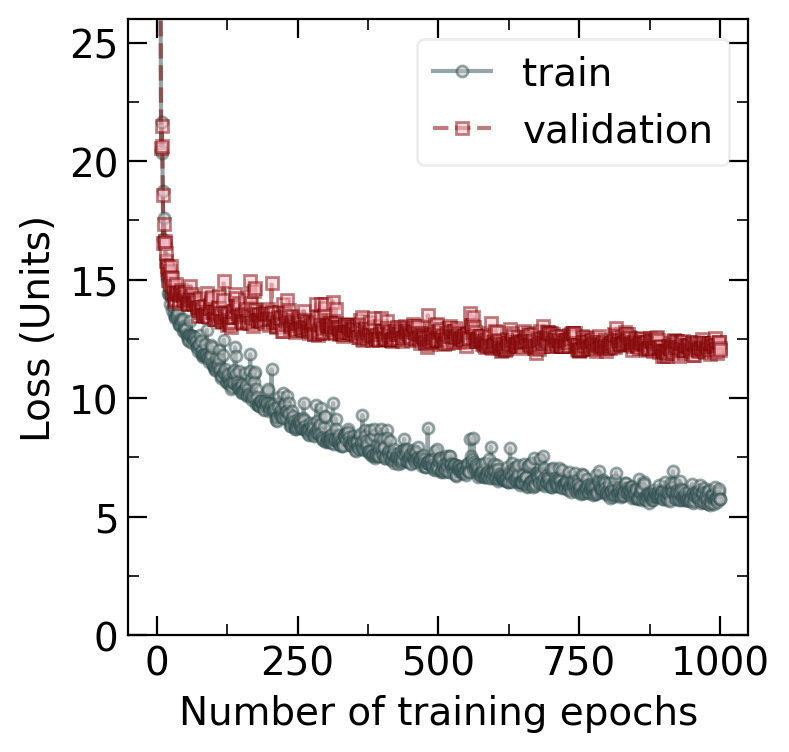

In [4]:
# Read in loss curve data
df_lc = pd.read_csv('ML_figures/example_data/training_progress.csv')
epoch = df_lc['epoch']
train_err, val_err = df_lc['mae_train'], df_lc['mae_val']

loss_curve(epoch, train_err, val_err,
           save_dir='ML_figures/example_figures')

## Visualizing elemental prevalence

Depending on your dataset, what you are studying, and how the compounds/constituent elements of the compounds in the dataset are distributed, it may be useful to visualize the elemental prevalence in your dataset.

These figures let you visualize the relative amount of certain elements vs. other elements present in your dataset, and can help you in identifying dataset biases, imbalanced datasets, or other issues.

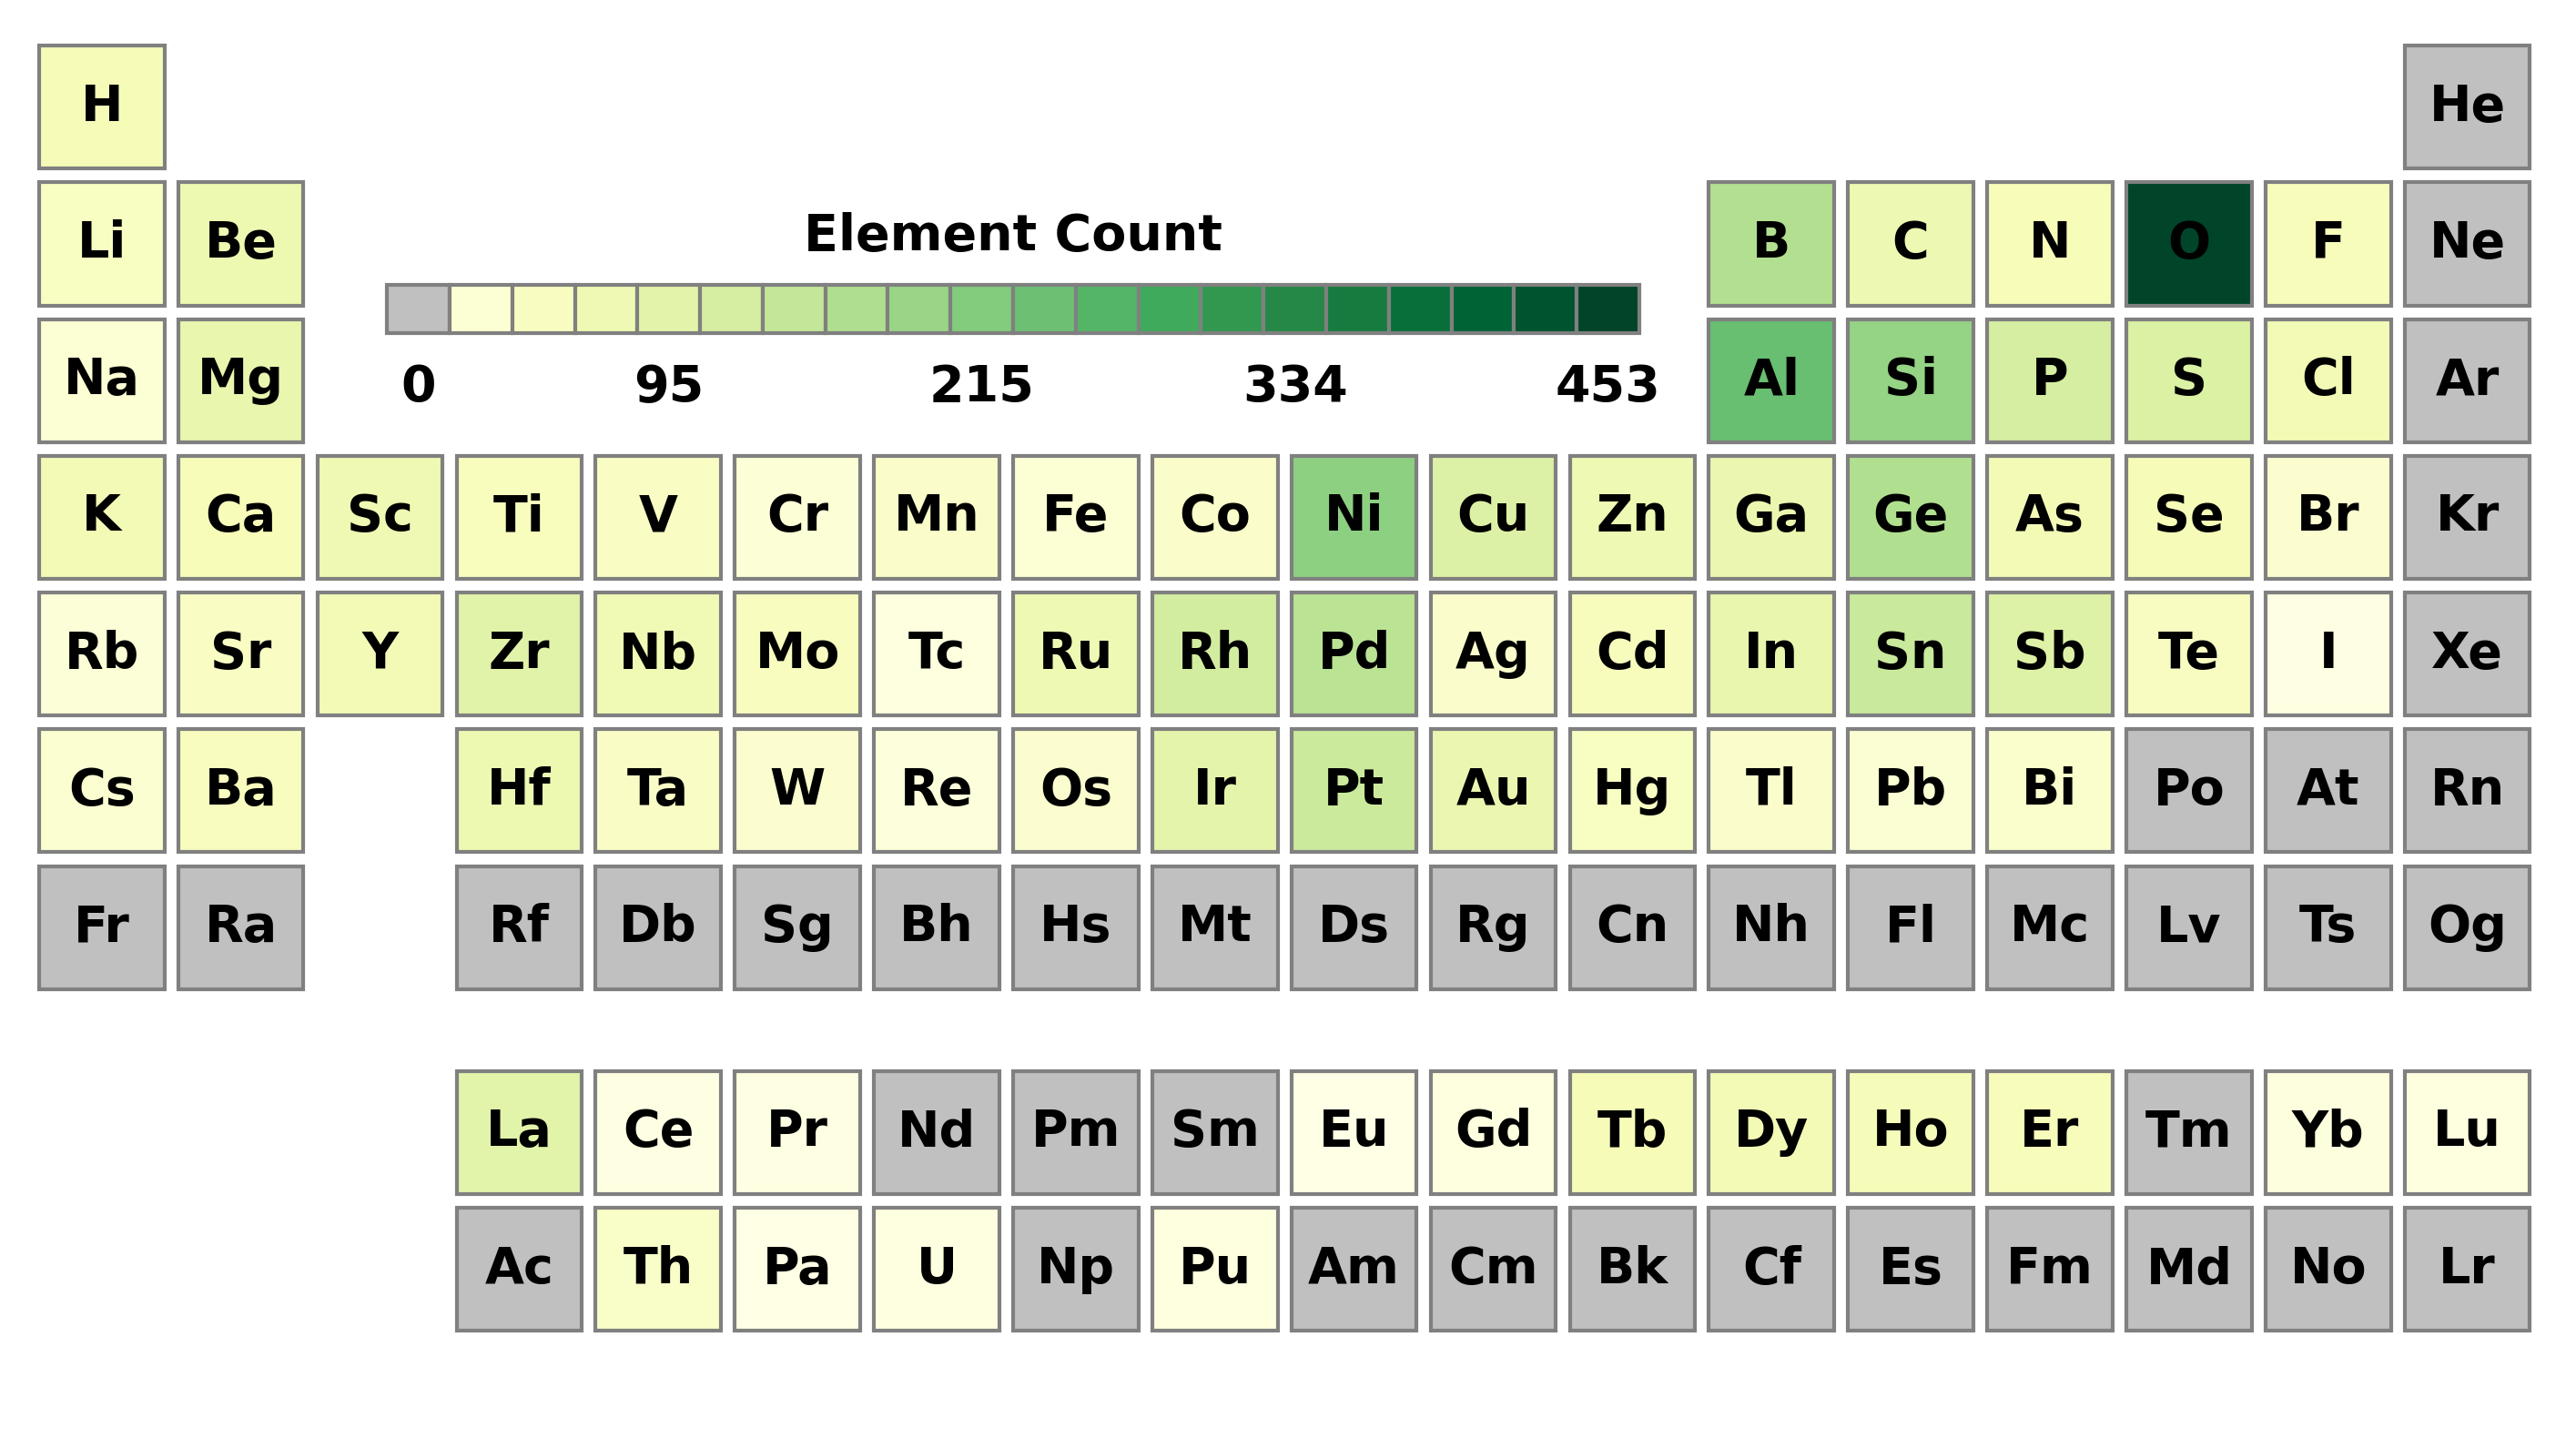

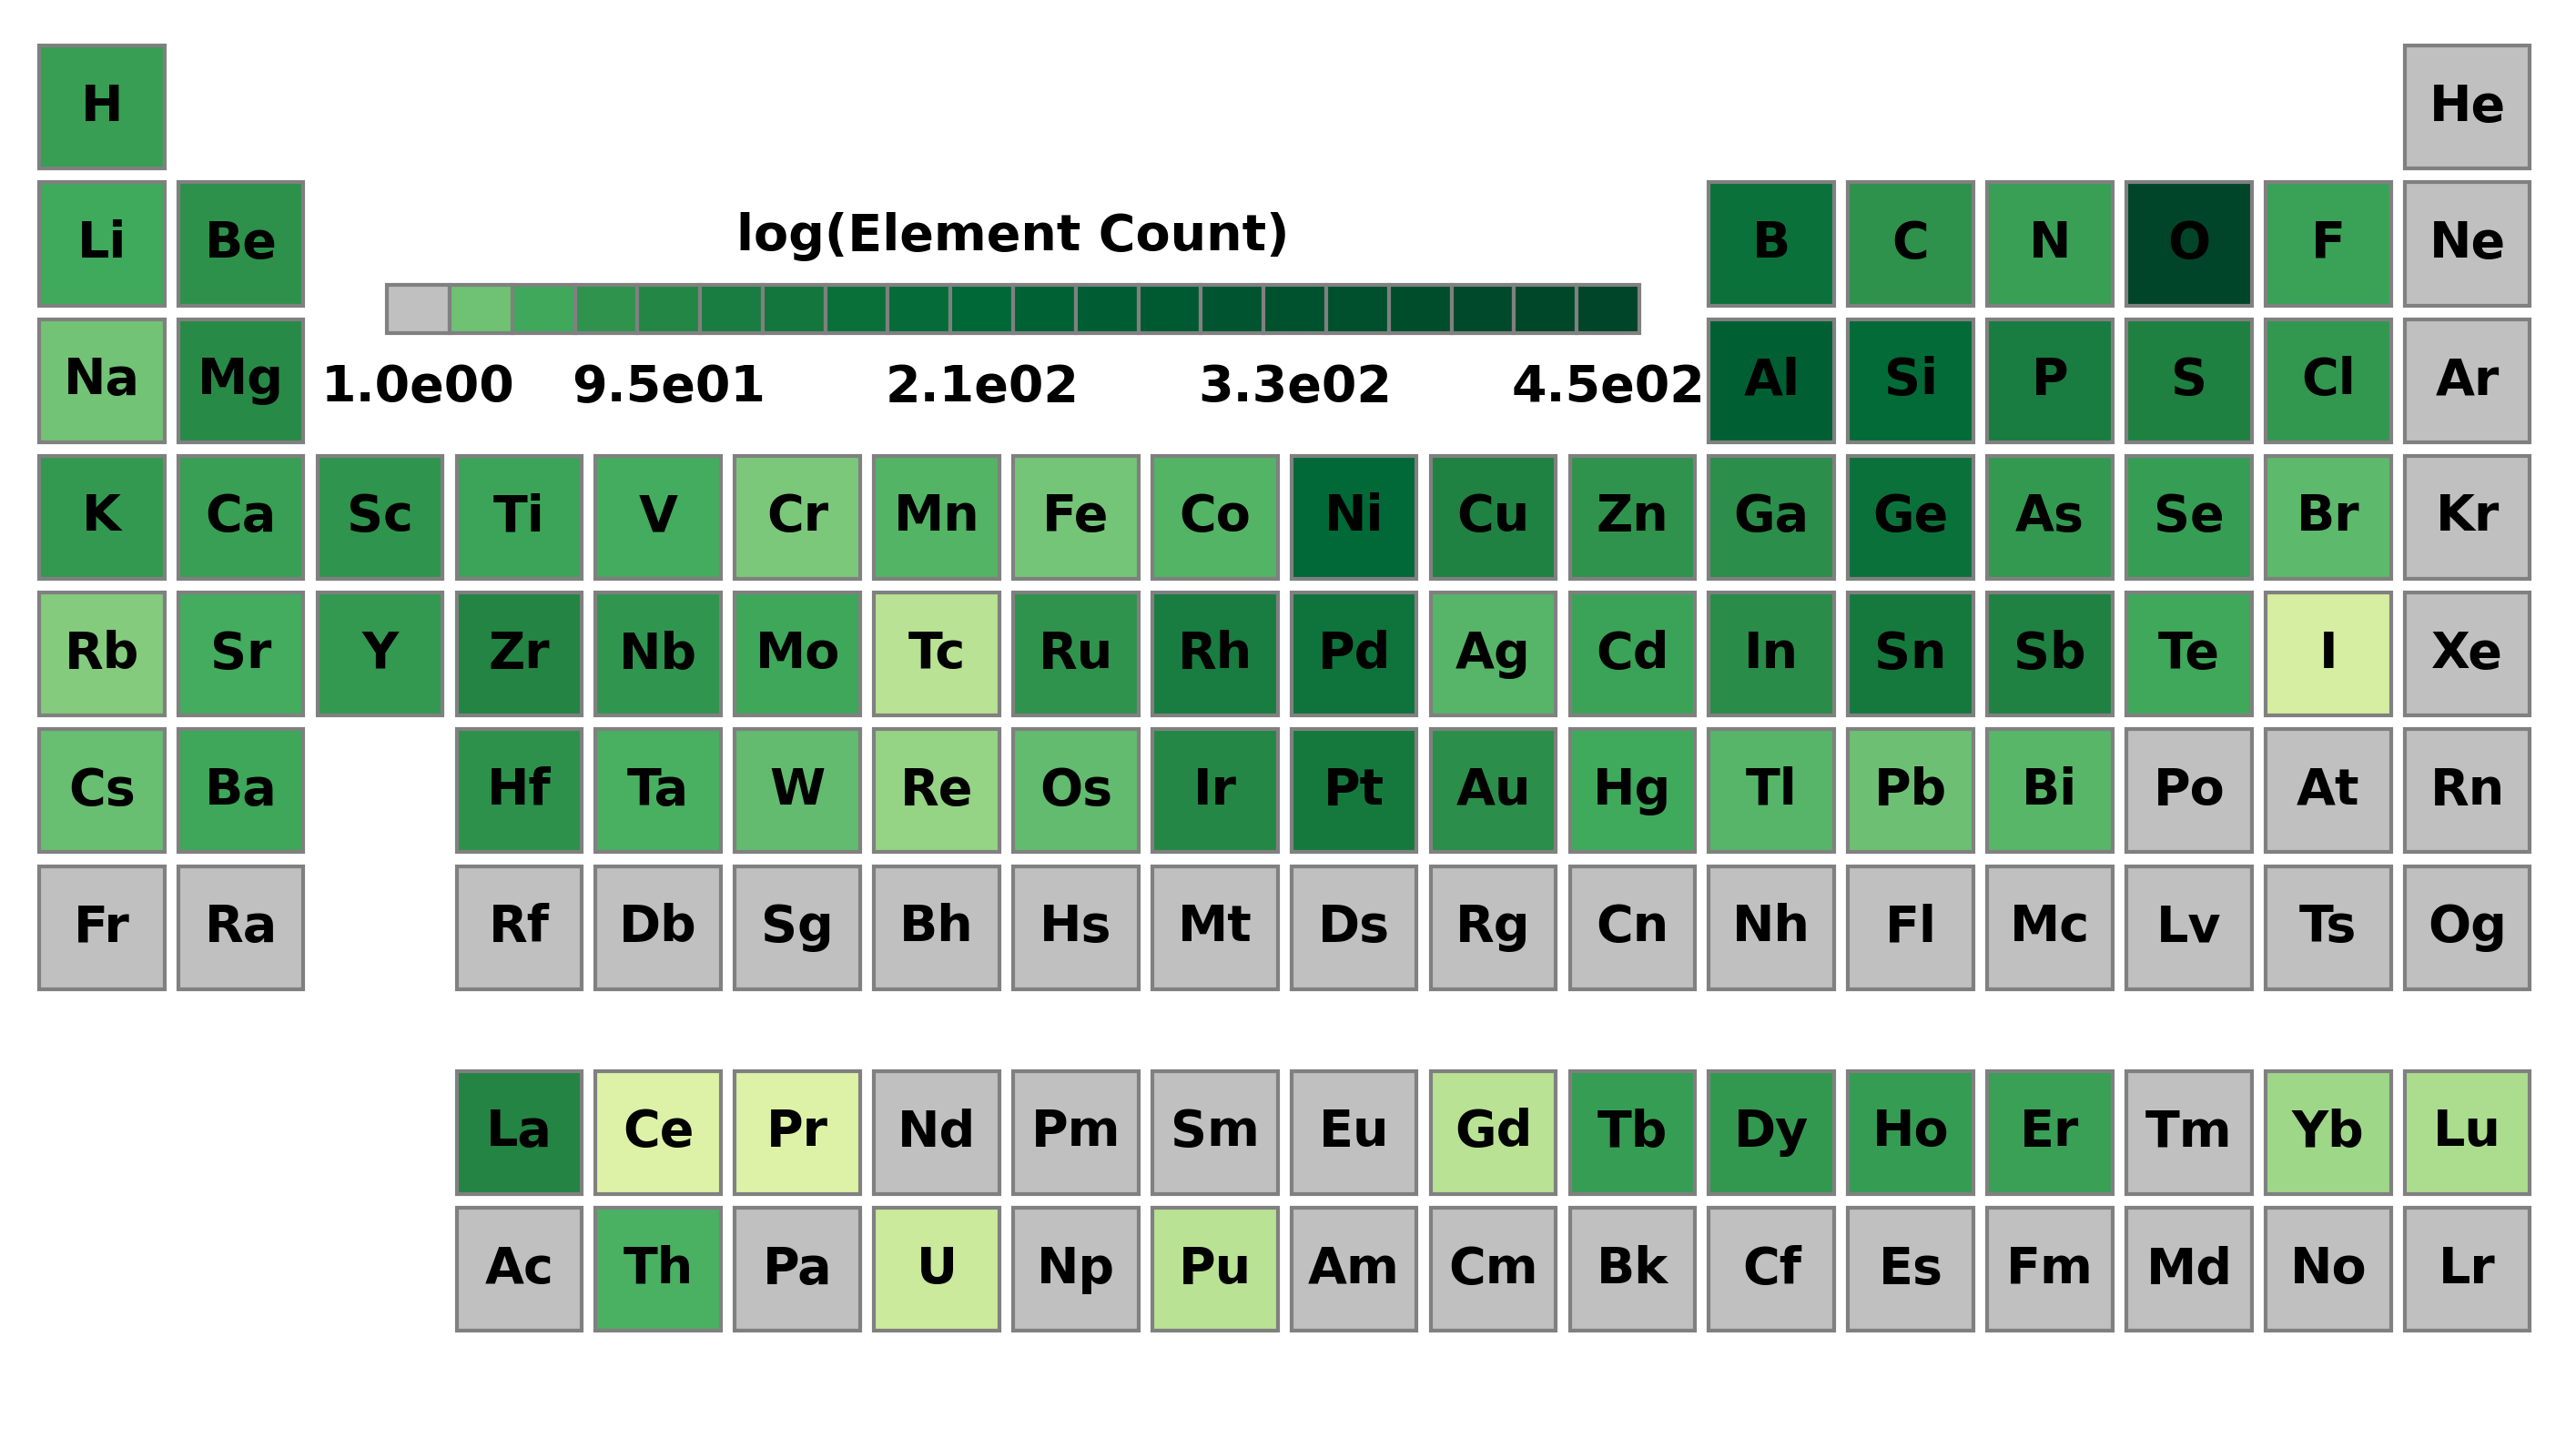

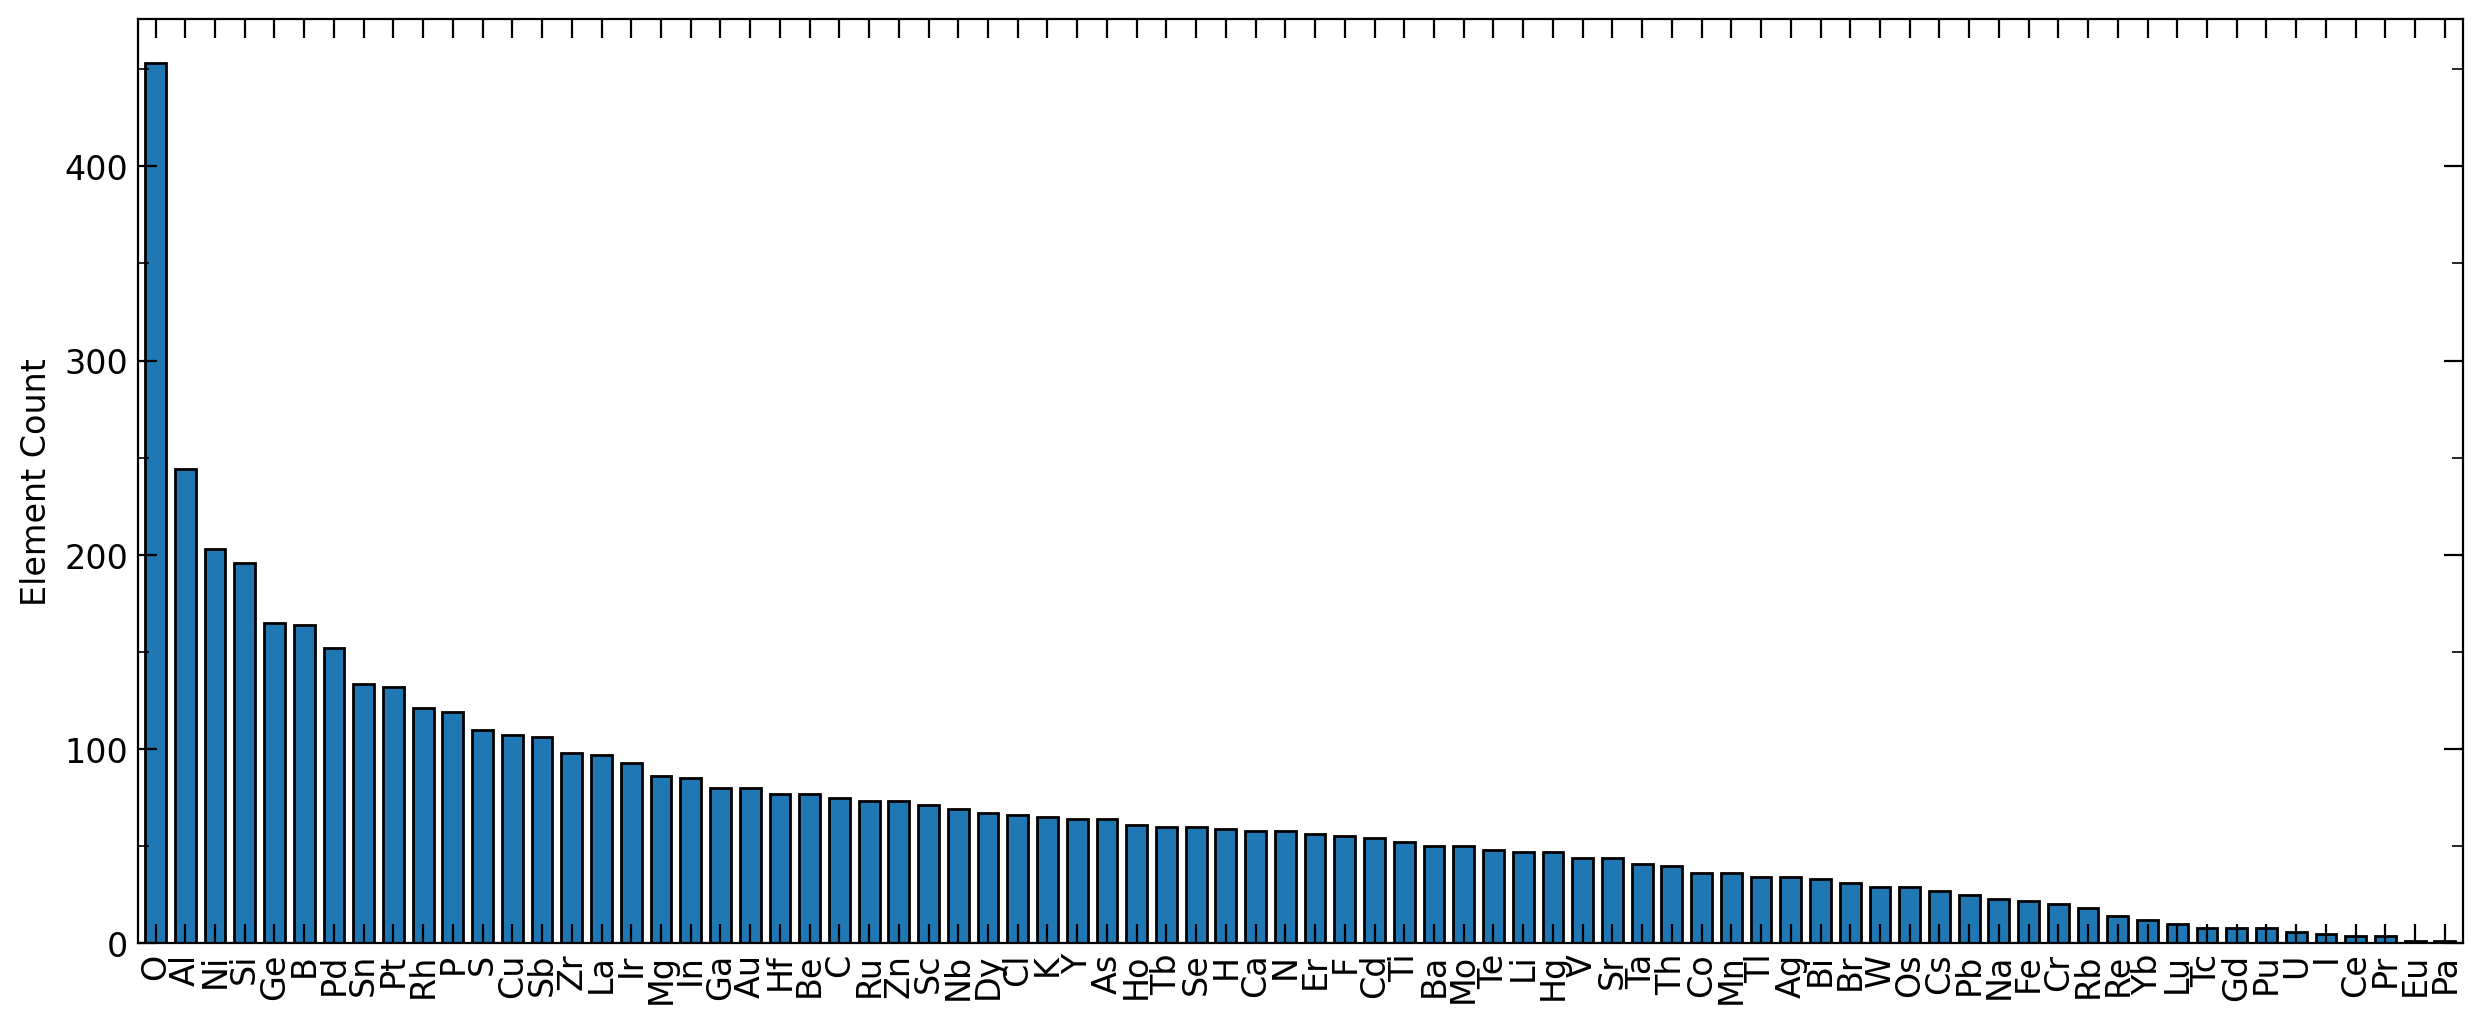

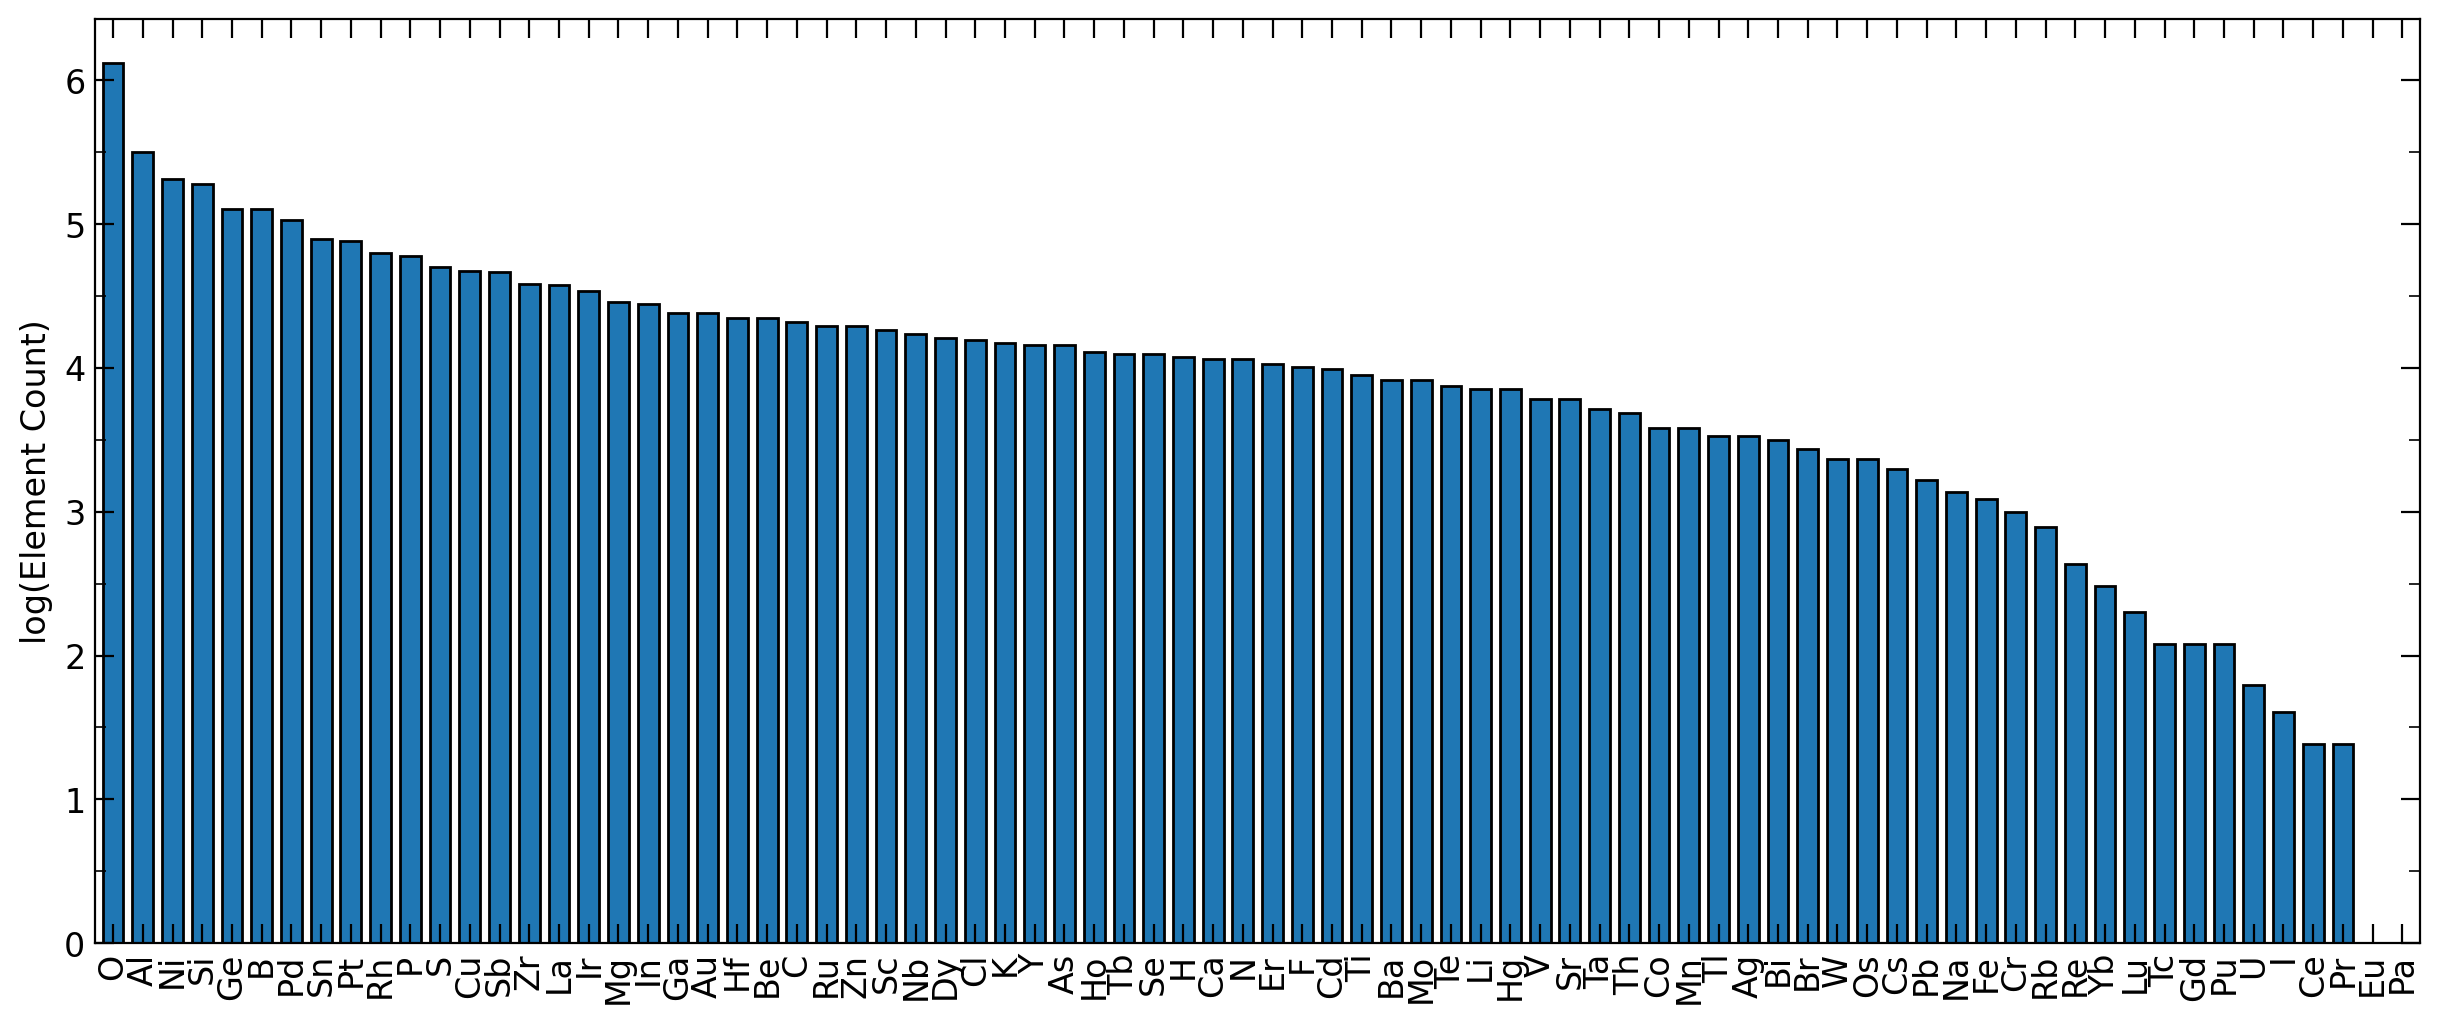

In [5]:
# Visualize element prevalence
formula = df_act_pred.iloc[:, 0]

element_prevalence(formula,
                   save_dir='ML_figures/example_figures',
                   log_scale=False)
element_prevalence(formula,
                   save_dir='ML_figures/example_figures',
                   name='example_log',
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   save_dir='ML_figures/example_figures',
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   save_dir='ML_figures/example_figures',
                   name='example_log',
                   ptable_fig=False,
                   log_scale=True)